In [ ]:
#Customer Segmentation using K-Means


In [14]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Loading the Dataset
df = pd.read_csv('E:/ML Projects/mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#Checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

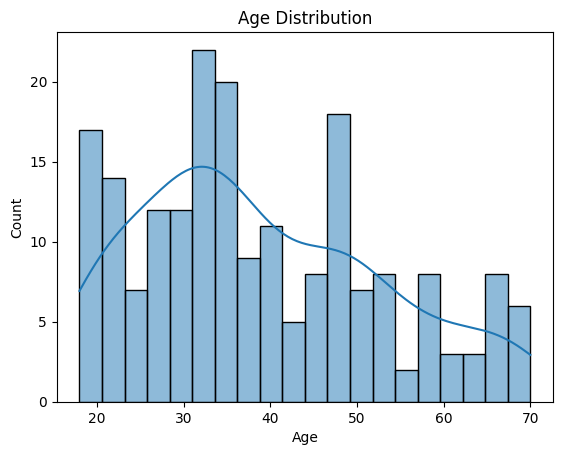

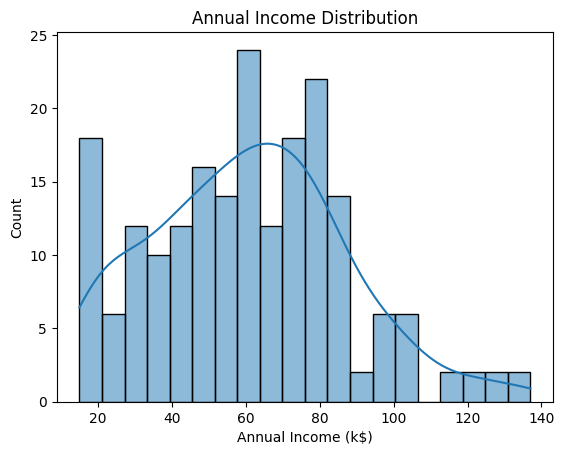

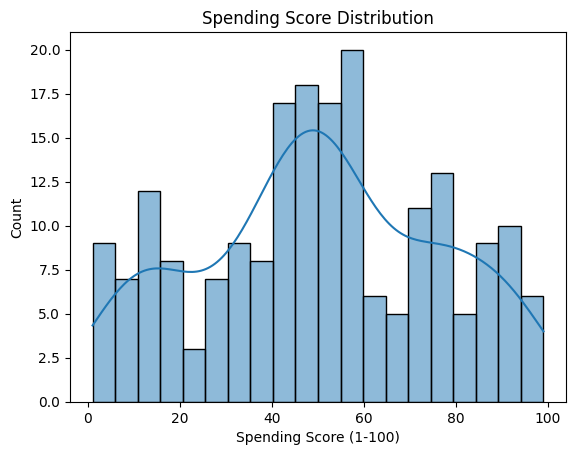

In [11]:
#Exploratory Data Analysis
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.show()

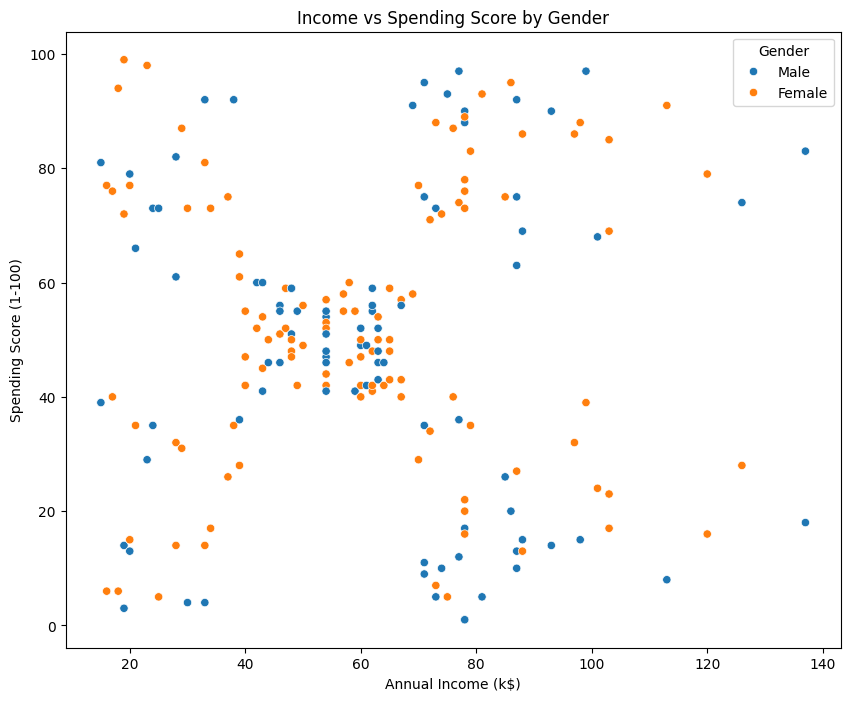

In [16]:
#Income vs Spending Score
plt.figure(figsize=(10,8))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=df)
plt.title('Income vs Spending Score by Gender')
plt.savefig('E:/ML Projects/Income_vs_spending_score_scatter_plot.png')
plt.show()

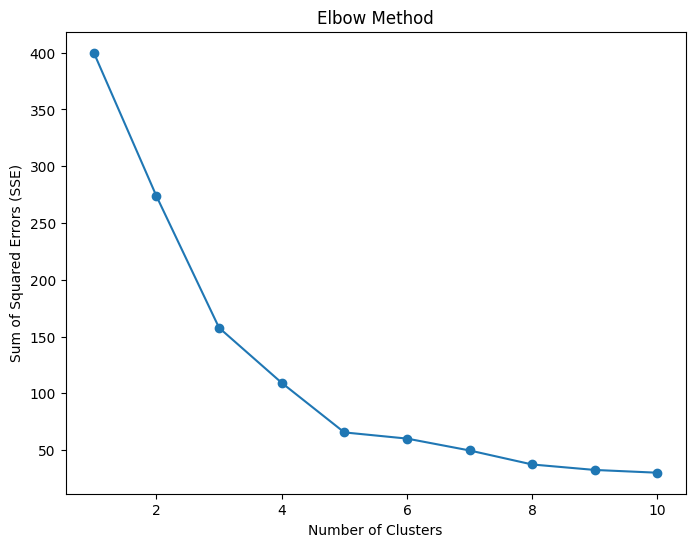

In [8]:
#Finding Optimal Clusters (Elbow Method)
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k,random_state = 42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

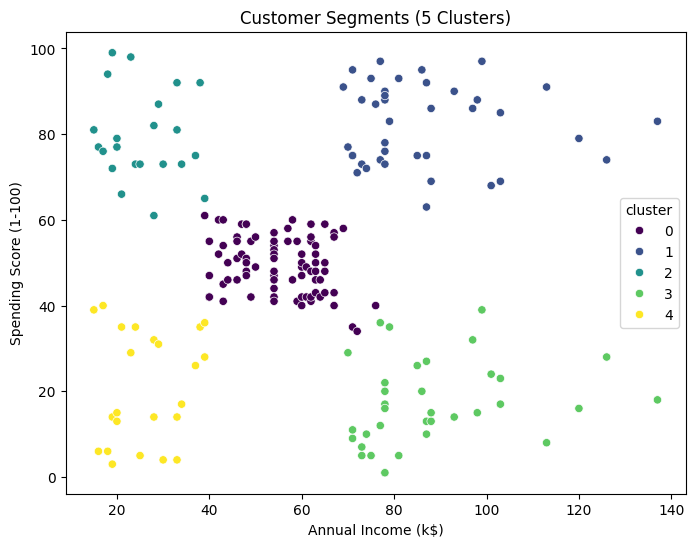

In [17]:
#Applying K-Means Clustering
kmeans = KMeans(n_clusters = 5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

#Cluster Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue=df['cluster'], palette='viridis', data = df)
plt.title('Customer Segments (5 Clusters)')
plt.savefig('E:/ML Projects/customer_segments_5_clusters.png')
plt.show()

In [13]:
#Cluster Interpretation
df.groupby('cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean().round(1)

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,42.7,55.3,49.5
1,32.7,86.5,82.1
2,25.3,25.7,79.4
3,41.1,88.2,17.1
4,45.2,26.3,20.9
